### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,1.0,0.0,9.0,2.0,11.0,35.0,37.0,0,15.0,-2.0
1,2542,2433,2,0,109,2487.5,1,109,9,12.0,...,0.0,0.0,1.0,3.0,4.0,25.0,23.0,0,19.0,2.0
2,2404,2534,0,0,130,2469.0,0,-130,0,21.0,...,1.0,1.0,0.0,0.0,0.0,35.0,30.0,1,10.0,5.0
3,2752,2395,2,0,357,2573.5,1,357,0,16.0,...,0.0,1.0,0.0,1.0,1.0,32.0,26.0,0,17.0,6.0
4,2558,2685,2,0,127,2621.5,0,-127,1,28.0,...,1.0,0.0,0.0,0.0,0.0,38.0,33.0,0,9.0,5.0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2050967, 33)
Target: (2050967,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 184.96 seconds (3.08 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5966 (59.66%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.58      0.67      0.62    164829
        Draw       0.60      0.30      0.40     71268
   White Win       0.61      0.65      0.63    174097

    accuracy                           0.60    410194
   macro avg       0.60      0.54      0.55    410194
weighted avg       0.60      0.60      0.59    410194



### 6. Confusion Matrix

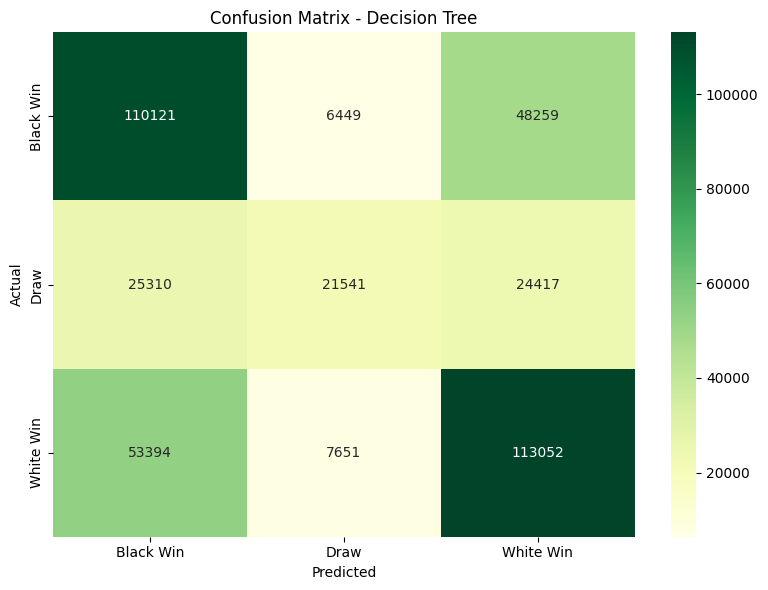

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                  Feature  Importance
10    material_diff_early    0.279515
4               AvgRating    0.154880
6    WhiteRatingAdvantage    0.128892
1                BlackElo    0.068365
3              RatingDiff    0.039014
0                WhiteElo    0.037616
32          activity_diff    0.032471
29       b_piece_activity    0.024213
9        b_material_early    0.022240
28       w_piece_activity    0.019403
15     b_aggression_early    0.018491
8        w_material_early    0.015531
16  aggression_diff_early    0.015390
2             EventTypeID    0.014826
7                   ECOID    0.014549
27           early_checks    0.010571
19            center_diff    0.010207
14     w_aggression_early    0.009142
18       b_center_control    0.008004
22       development_diff    0.007869
26         b_checks_early    0.007845
17       w_center_control    0.007688
31   total_captures_early    0.007386
12       b_captures_early    0.007383
25         w_checks_early    

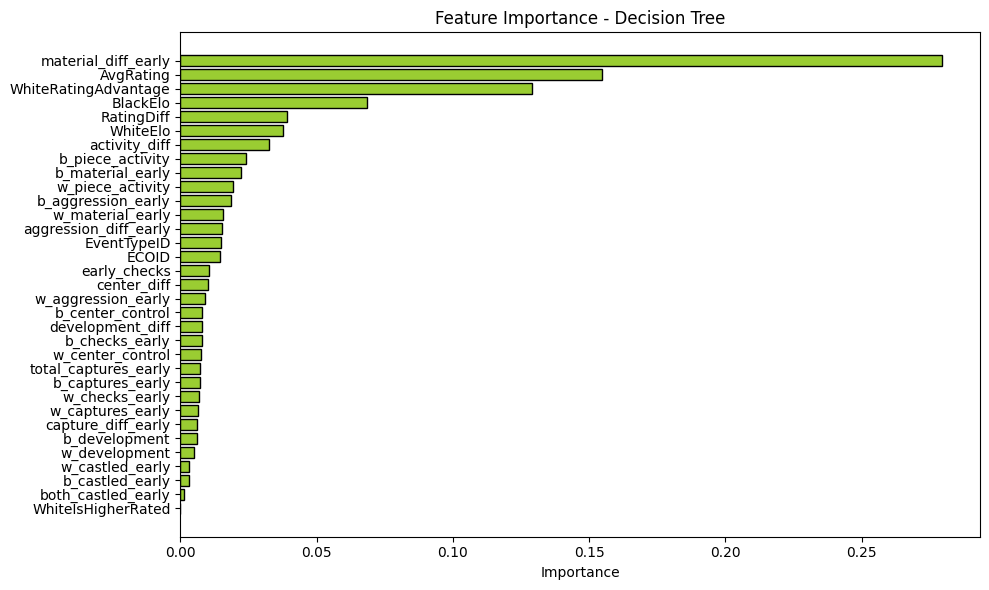

In [9]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],
         color='yellowgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()